<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%EA%B2%B0%EC%A0%9C_%ED%8E%98%EC%9D%B4%EC%A7%80%EC%97%90%EC%84%9C_%EC%BF%A0%ED%8F%B0%EC%9D%84_%EC%A3%BC%EB%8A%94_%EC%95%A1%EC%85%98%EC%9D%B4_%EC%9C%A0%ED%9A%A8%ED%95%9C_%ED%94%84%EB%A1%9C%EB%AA%A8%EC%85%98%EC%9D%B8%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[상황]

- 문제 파악 :
    
    결제 마지막 페이지에서 이탈률이 높은 상황입니다.
    
    확인 해 본 결과, 결제 페이지 오류는 없는 상황입니다.
    
    금액이 고객들의 구매 결정에 걸림돌이 되는 것으로 예상됩니다.
    
- 원하는 결과 :
    
    결제 마지막 페이지에서 고객 이탈율을 줄이고 싶습니다.

- 가설 :

    결제 마지막 페이지에서 할인 쿠폰을 제공하여 금액적으로 구매 결정에 걸림돌을 제거해준다면 결제율을 높일수 있을 것이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_csv('user_db1.csv')
df.head()
#group 할인 받은자 = 1, 할인을 받지 못한 사람 = 0

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0


In [3]:
#할인을 받아 결제한 사람과 정가 결제 한 사람의 인원 수 구하기

df_sum_discounted_student = df[df['group'] == 1]['user_id'].count()
df_sum_discounted_student

5654

In [4]:
df_sum_notdiscounted_student = df[df['group'] == 0]['user_id'].count()
df_sum_notdiscounted_student

2474

In [5]:
#위의 결과 값으로 쿠폰 할인은 결제까지 이어지는 과정 중 유의미한 변수라는 것을 착안
#각 결제 인원에서 실제 실험 인원인 12000명을 나누고 각 퍼센테이지 구하기
percent_of_students_by_not_discounted = df_sum_notdiscounted_student/12000 *100
percent_of_students_by_discounted = df_sum_discounted_student/12000 *100
print(percent_of_students_by_not_discounted , percent_of_students_by_discounted )

20.616666666666667 47.11666666666667


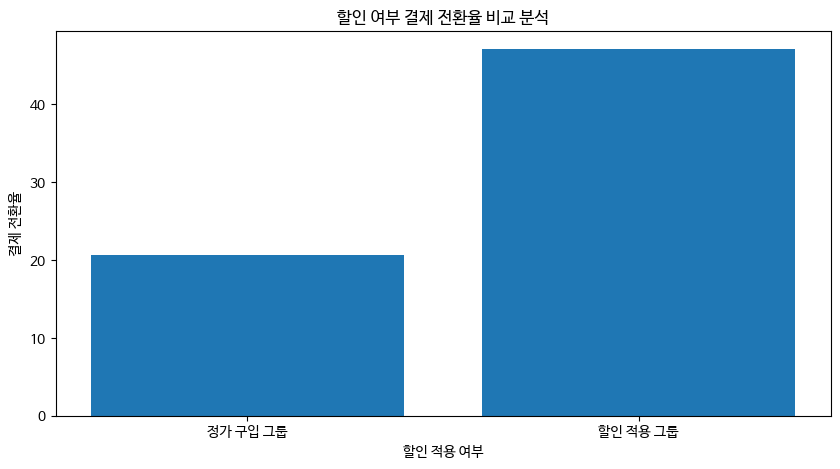

In [6]:
#그래프 사이즈
plt.figure(figsize=(10,5))
#x 그룹 지정하기
x_list =["정가 구입 그룹", "할인 적용 그룹"]
#y 값
#각각 어떤 값이 들어가야 하는지 입력해 볼까요?
y_list = [percent_of_students_by_not_discounted, percent_of_students_by_discounted]

#x,y값 설정
plt.bar(x_list, y_list)
#그래프 타이틀
plt.title('할인 여부 결제 전환율 비교 분석')
#x축 레이블
plt.xlabel('할인 적용 여부')
#y축 레이블
plt.ylabel('결제 전환율')
#그래프 보여주기
plt.show()

결제 마지막 페이지에서 할인 혜택을 제공할 경우 결제율을 올릴 수 있다는 것을 확인

그렇다면 얼마만큼의 할인 혜택을 제공하는 것이 결제 전환율을 가장 높일 수 있는지 새로운 궁금증이 생겼고, 새로운 가설을 새워 다시 분석을 해보았다

- 증명하고자 하는 가설 :

할인율이 높으면 높을 수록 결제 전환율도 높을 것이다.


In [7]:
df = pd.read_csv('user_db1.csv')
#discounted = 할인금액
df.head()

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0


In [9]:
#할인 금액별로 사람 수 세기

df_discounted_person = df.groupby('discounted')['user_id'].count()
df_discounted_person

,user_id
discounted,
10000.0,808
20000.0,1588
30000.0,3258


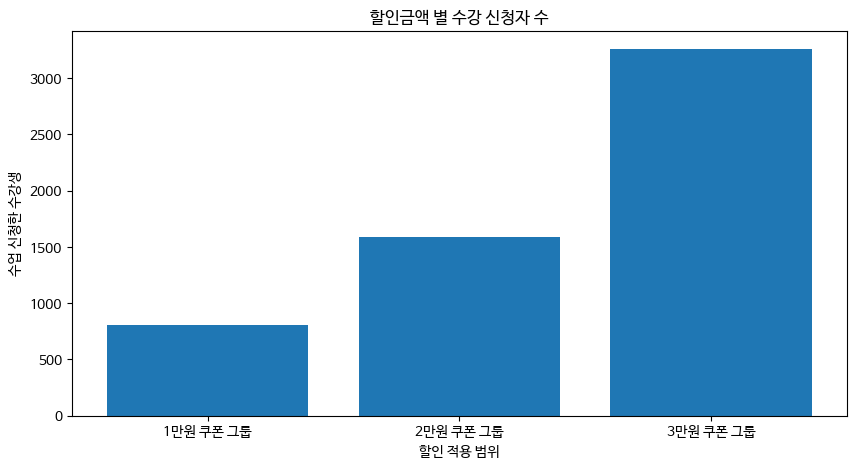

In [11]:
#그래프 사이즈
plt.figure(figsize=(10,5))
x_list =["1만원 쿠폰 그룹", "2만원 쿠폰 그룹", "3만원 쿠폰 그룹"]
#x,y값 설정
plt.bar(x_list, df_discounted_person.values)
#그래프 타이틀
plt.title('할인금액 별 수강 신청자 수')
#x축 레이블
plt.xlabel('할인 적용 범위')
#y축 레이블
plt.ylabel('수업 신청한 수강생')
#그래프 보여주기
plt.show()


분석 보고서 결론

최종적으로 결제 페이지에서 쿠폰을 주는 프로모션은 유의미한 프로모션이었고,
그 중에서도 할인율이 높으면 높을 수록 결제 전환율도 높을 것이다. 라는 가설을 증명해 내었다

